In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

## IMDB-Wiki
Dataset downloaded from https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

https://github.com/imdeepmind/processed-imdb-wiki-dataset

In [2]:
ds_path = 'C:/0_thesis/dataset/'
csv_path = 'C:/0_thesis/dataset/'
filename_csv = 'imdbwiki-data.csv'

### ONLY ONCE Create a DataFrame structure for the dataset

In [3]:
# https://github.com/imdeepmind/processed-imdb-wiki-dataset/blob/master/mat.py

import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

imdb_mat = ds_path + 'imdb_crop/imdb.mat'
wiki_mat =  ds_path + 'wiki_crop/wiki.mat'

imdb_data = loadmat(imdb_mat)
wiki_data = loadmat(wiki_mat)

del imdb_mat, wiki_mat

imdb = imdb_data['imdb']
wiki = wiki_data['wiki']

imdb_photo_taken = imdb[0][0][1][0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
#imdb_name_celebrity = imdb[0][0][4][0]
imdb_face_location = imdb[0][0][5][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
#wiki_name_celebrity = wiki[0][0][4][0]
wiki_face_location = wiki[0][0][5][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

KeyboardInterrupt: 

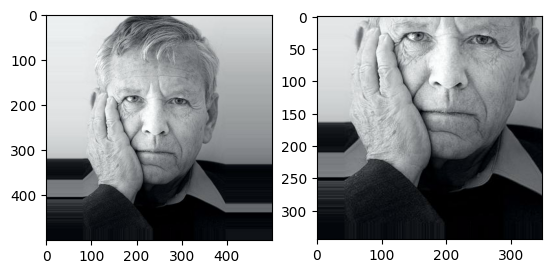

In [4]:
# Test to see if image cropped based on face-location is consistent: NOT
#img_index = 1703 # FAIL face-location is a line or point
#img_index = 2000 # FAIL face-location is not a face
'''
img_index = 2500 # TRUE face-location is a cropped face
image = cv2.imread("./wiki_crop/"+wiki_full_path[img_index][0])

image_face_location = wiki_face_location[img_index][0]

y = int(image_face_location[0])
x = int(image_face_location[1])
h = int(image_face_location[2])
w = int(image_face_location[3])

if y != h and x != w:
    crop_image = image[x:w, y:h]
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(crop_image)
'''

In [23]:
imdb_path = []
wiki_path = []

imdb_filename = []
wiki_filename = []

for path in imdb_full_path:
    imdb_path.append( ds_path + '/imdb_crop/' + path[0])
    imdb_filename.append(path[0].split('/')[1])

for path in wiki_full_path:
    wiki_path.append( ds_path + '/wiki_crop/' + path[0])
    wiki_filename.append(path[0].split('/')[1])

# gender
imdb_genders = []
wiki_genders = []

## imdb
for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male')
    else:
        imdb_genders.append('female')

## wiki
for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')
        
# when photo is taken
imdb_dob = []
wiki_dob = []

for file in imdb_filename:
    temp = file.split('_')[2]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]
    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'
    temp
    imdb_dob.append('-'.join(temp))

for file in wiki_filename:
    wiki_dob.append(file.split('_')[1])

In [24]:
# age
imdb_age = []
wiki_age = []

## imdb
for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = int(rdelta.years)
    except Exception as ex:
        print(ex)
        diff = -1
    imdb_age.append(diff)

## wiki
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = int(rdelta.years)
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)


time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

In [25]:
cols = ['age', 'gender', 'filepath', 'filename', 'face_score1', 'face_score2']

final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_filename, imdb_face_score1, imdb_face_score2)).T
final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_filename, wiki_face_score1, wiki_face_score2)).T

final_imdb_df = pd.DataFrame(final_imdb)
final_wiki_df = pd.DataFrame(final_wiki)

final_imdb_df.columns = cols
final_wiki_df.columns = cols

df = pd.concat((final_imdb_df, final_wiki_df))

df = df[df['face_score1'] != '-inf']
df = df[df['face_score2'] == 'nan']

df = df.drop(['face_score1', 'face_score2'], axis=1)

df['age'] = df['age'].astype('int')
df = df.drop(df[df.age < 0].index)

df = df.sample(frac=1)

df.to_csv(csv_path + filename_csv, index=False)

### Analysis: observe the balance in the dataset of gender, age

In [8]:
df = pd.read_csv(csv_path + filename_csv)
n_tot_images = df.shape[0]
n_tot_images
#df.head()

224624

In [5]:
df['age'] = df['age'].astype('int')
df.age.max()

429

In [6]:
df.columns

Index(['age', 'gender', 'filepath', 'filename', 'age-group'], dtype='object')

### Gender

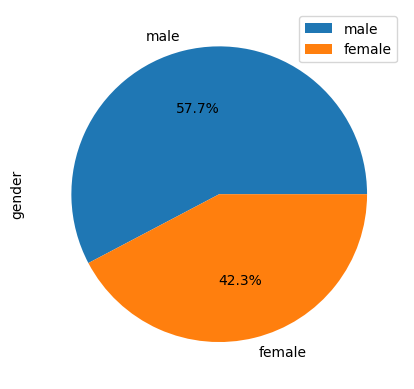

In [7]:
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

### Age

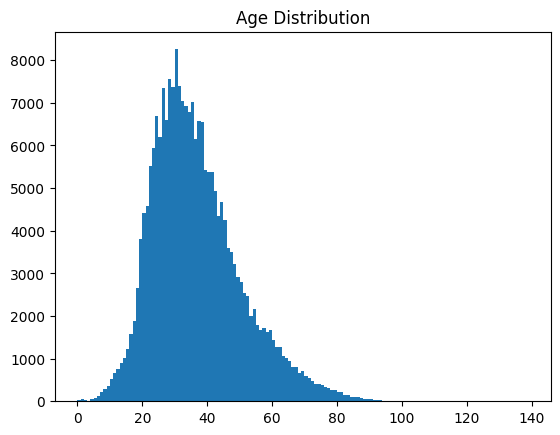

In [12]:
plt.hist(df['age'], range(140))
plt.title('Age Distribution')
plt.show()

In [9]:
from age_groups import *

ranges = AgeGroups().getRanges()

print("The percentage of images to the total in ")
count_age_ranges = []
for r in ranges:
    count_age_range = sum([len(df[df.age == j]) for j in r])
    count_age_ranges.append(count_age_range)
    print(r, "years:", round(count_age_range/n_tot_images*100,2))

The percentage of images to the total in 
range(0, 3) years: 0.05
range(3, 13) years: 1.37
range(13, 20) years: 5.81
range(20, 30) years: 27.7
range(30, 40) years: 30.32
range(40, 50) years: 18.78
range(50, 60) years: 9.08
range(60, 70) years: 4.46
range(70, 80) years: 1.78
range(80, 90) years: 0.53
range(90, 100) years: 0.09
range(100, 117) years: 0.01


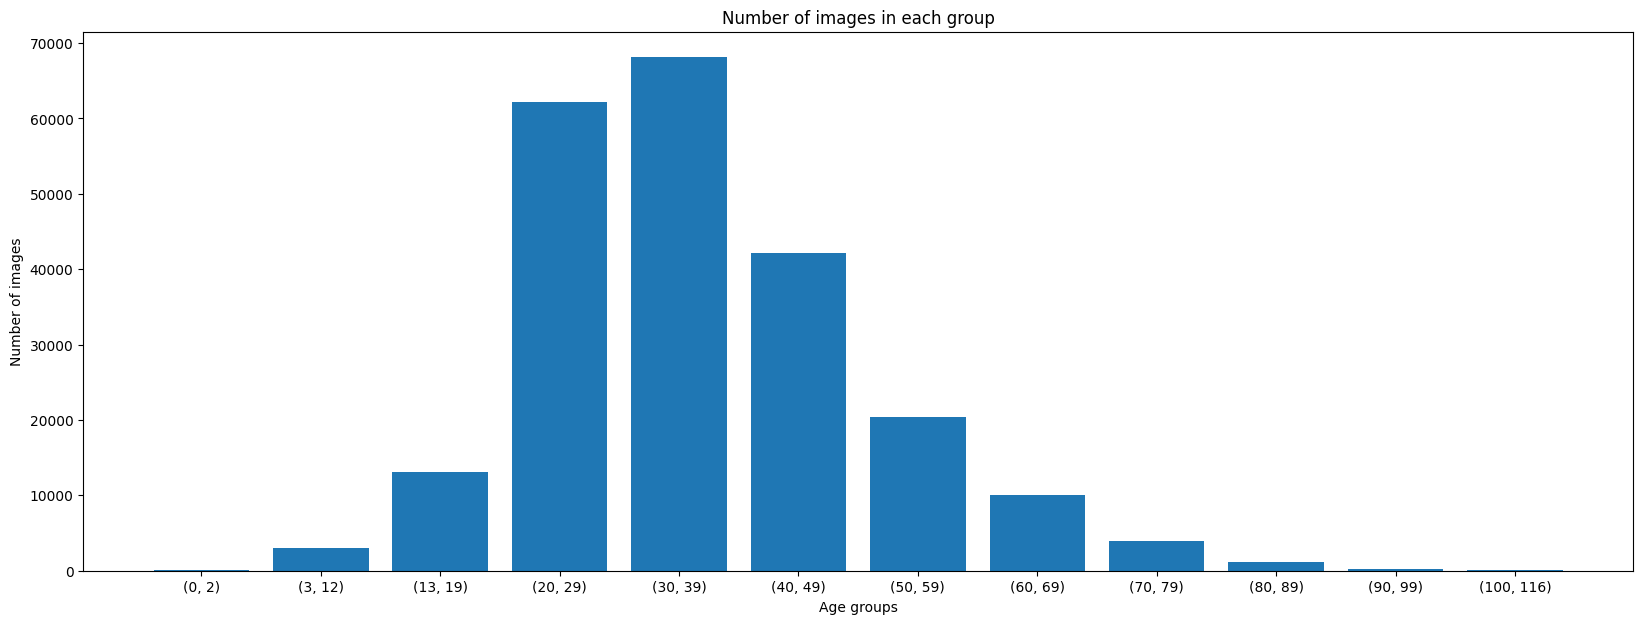

In [12]:
# Show a plot with the age distribution
ranges_axis = []

for r in ranges:
    ranges_axis.append("("+str(min(r))+", "+str(max(r))+")")

x_pos = np.arange(len(ranges))
fig = plt.figure(dpi=100, figsize=(20, 7)) 
plt.bar(x_pos, count_age_ranges, align='center')
plt.xticks(x_pos, ranges_axis)
plt.ylabel('Number of images')
plt.xlabel('Age groups')
plt.title('Number of images in each group')
plt.show()

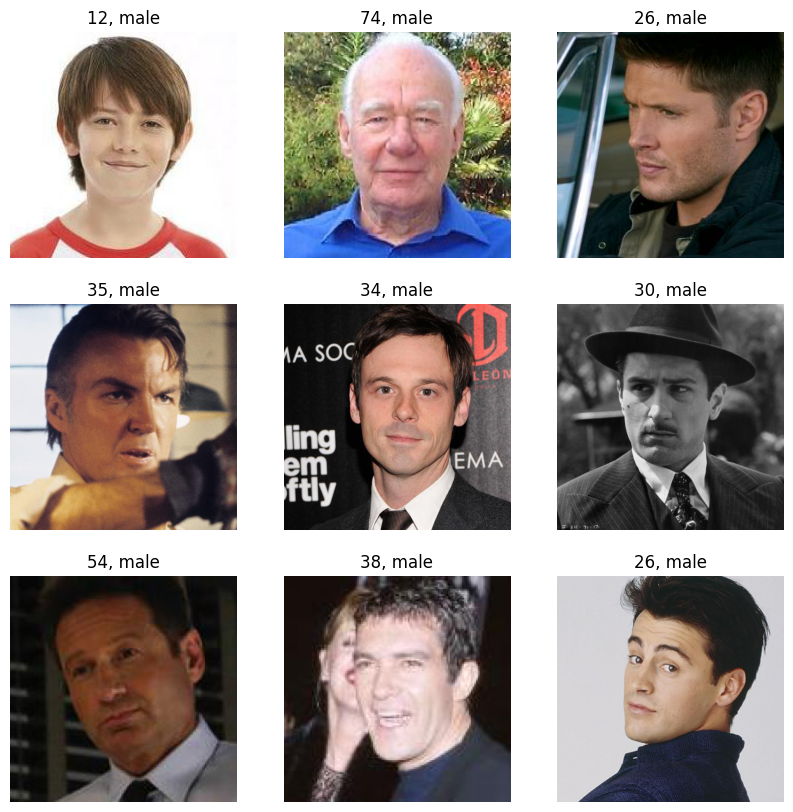

In [19]:
plt.figure(figsize=(10,10))
for i in range(9):
    sample = df.loc[i]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title('%i, %s' % (sample.age, sample.gender))
    plt.imshow(Image.open(sample.filepath))